# 桥梁裂缝检测

下载数据集：

```sh
kaggle datasets download -d xinzone/surface-crack
```

回到根目录：

In [1]:
cd ../..

E:\kaggle\crack-book


获取数据集的根目录：

In [2]:
from apps.dataset import kaggle_root
# 获取数据根目录
root = kaggle_root() + '/datasets/xinzone/surface-crack/surface-crack.zip'

读取图片：

In [3]:
from zipfile import ZipFile
from PIL import Image
import numpy as np


def name2bunch(namelist):
    '''将 namelist 转换为 bunch'''
    name_bunch = {}
    for name in namelist:
        ns = name.split('/')
        name_type = ns[0]
        if name_type == 'predict':
            name_bunch.setdefault(name_type, []).append(name)
        else:
            label = ns[1]
            name_bunch.setdefault(name_type, []).append((name, label))
    return name_bunch


class ZipImage:
    def __init__(self, Z):
        '''
        Z: 图片的 ZipFile 对象
        '''
        self.Z = Z
        self.name_bunch = name2bunch(self.Z.namelist())

    def array(self, name):
        '''获取给定的 name 的图片像素信息'''
        with self.Z.open(name) as fp:
            with Image.open(fp) as im:
                img = np.array(im)
        return img

    def split(self, data_type):
        '''
        data_type: 'test', 'train', 'valid', 'predict'
        '''
        for ns in self.name_bunch[data_type]: 
            if ns == 'predict':
                img = self.array(ns)
                yield img
            else:
                name, label = ns
                img = self.array(name)
                yield img, label

In [4]:
Z = ZipFile(root)

I = ZipImage(Z)

train = I.split('train')
test = I.split('test')
valid = I.split('valid')
predict = I.split('predict')

Negative


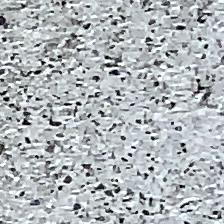

In [8]:
for img, label in train:
    print(label)
    break

Image.fromarray(img)